<a href="https://colab.research.google.com/github/Kshashi22/Forest_Fire/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [ ]:
data.dtypes

,0
year,int64
state,object
month,object
number,float64
date,datetime64[ns]


In [ ]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [ ]:
data.shape

(6454, 5)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6454
Number of Columns 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## **Checking Duplicate data and Droping Them**

In [ ]:
dup_data=data.duplicated().any()
print("Duplicate Data:",dup_data)

Duplicate Data: True


In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(6422, 5)

## **Checking Nulls Values From The Dataset**

In [ ]:
data.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


## **Overall Statistics of the Dataset**

In [ ]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## **Renaming months name to english**

In [ ]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
data['month_new']=data['month'].map({'Janeiro':'Jan','Fevereiro':'Feb',
                                     'Março':'Mar','Abril':'Apr',
                                     'Maio':'May','Junho':'Jun',
                                     'Julho':'Jul','Agosto':'Aug',
                                     'Setembro':'Sep','Outubro':'Oct',
                                     'Novembro':'Nov','Dezembro':'Dec'})

In [ ]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


## **Total Number of Fires Registered**

In [ ]:
data.shape

(6422, 6)

## **Maximum Number of Forest Fire reported month**

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data1=data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


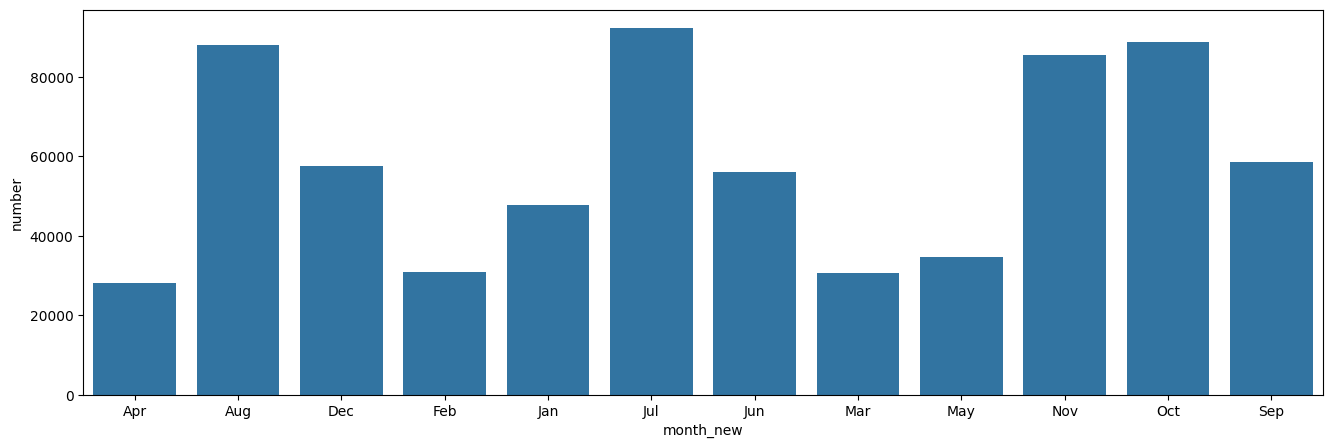

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data1)
plt.show()

## **Maximum Number of Forest Fire Reported Year**

In [ ]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


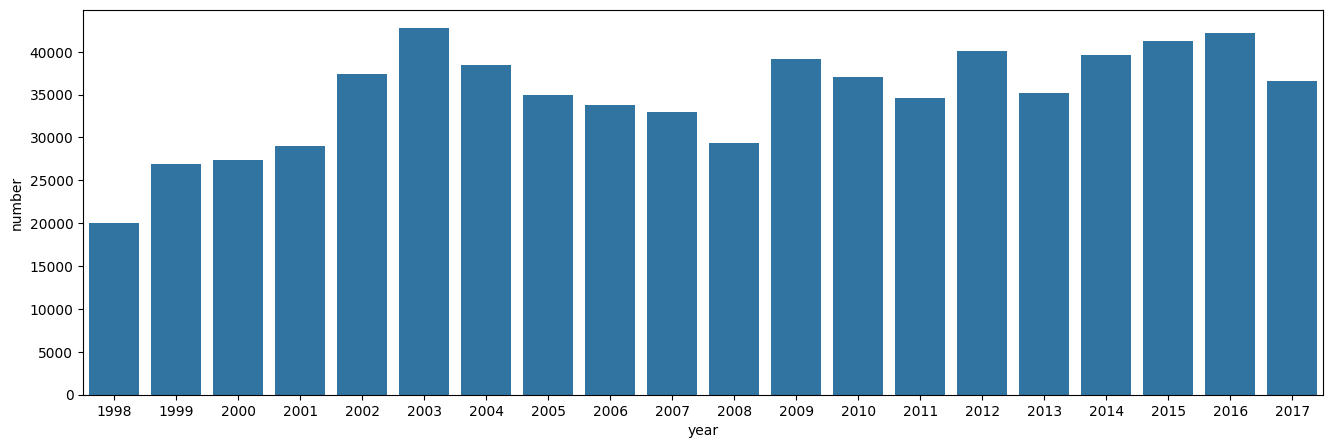

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)
plt.show()

## **Maximum Number of Fire Forest Reported State**

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


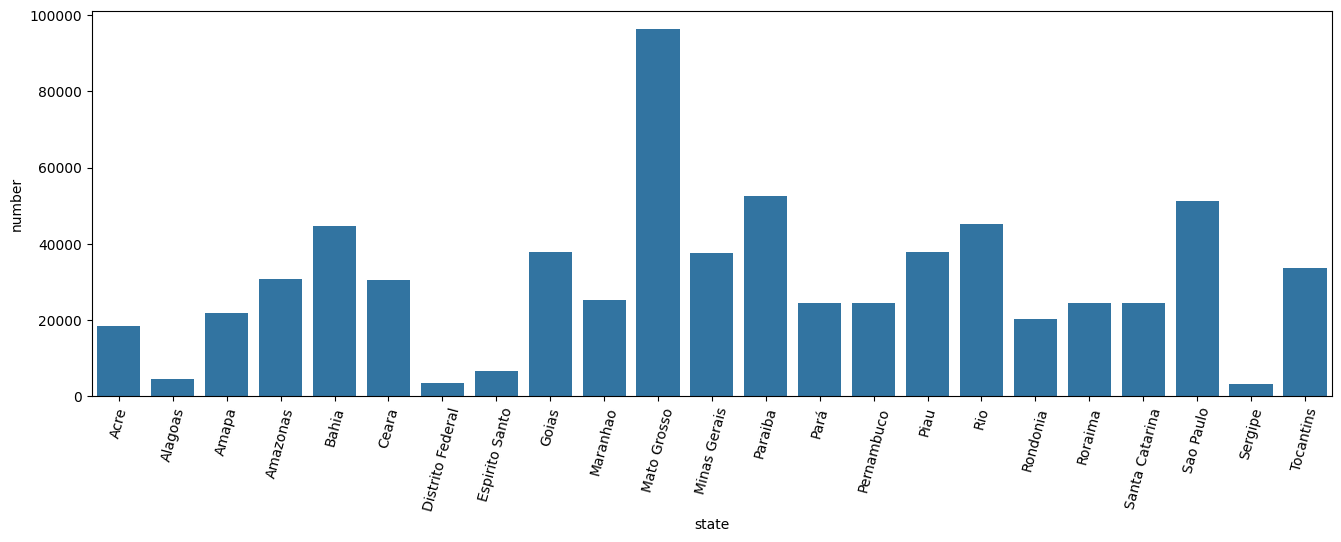

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)
plt.show()

## **Total Number Of Fires Reported In Amazonas**

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data[data['state']=='Amazonas']

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [ ]:
data[data['state']=='Amazonas']['number']

,number
718,0.0
719,3.0
720,7.0
721,3.0
722,17.0
...,...
952,80.0
953,236.0
954,293.0
955,565.0


In [ ]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

## **Number of Fires Reported in Amazonas (Year Wise)**

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data4=data[data['state']=='Amazonas']
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [ ]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


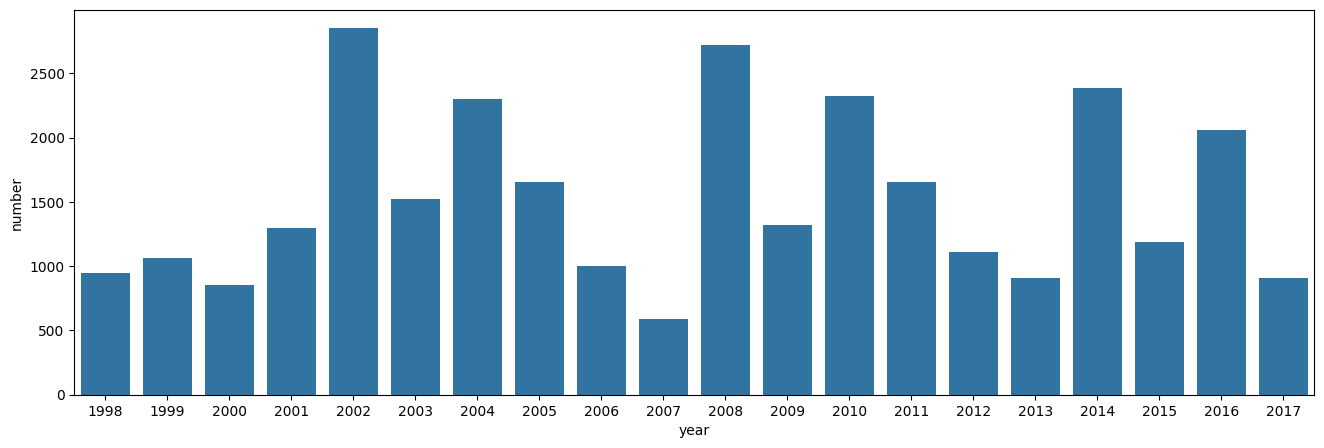

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)
plt.show()

## **Number of Fires Reported in Amazonas (Day Wise)**

---



In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data6=data[data['state']=='Amazonas']
data6.groupby(data6['date'].dt.dayofweek)['number'].sum()


,number
date,
0,1886.601
1,6474.217
2,3910.177
3,5754.802
4,5446.480
5,4162.666
6,3015.186


In [ ]:
import calendar
day=[calendar.day_name[x]for x in range(0,7)]
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
df = pd.DataFrame({'day': day, 'number': range(7)})

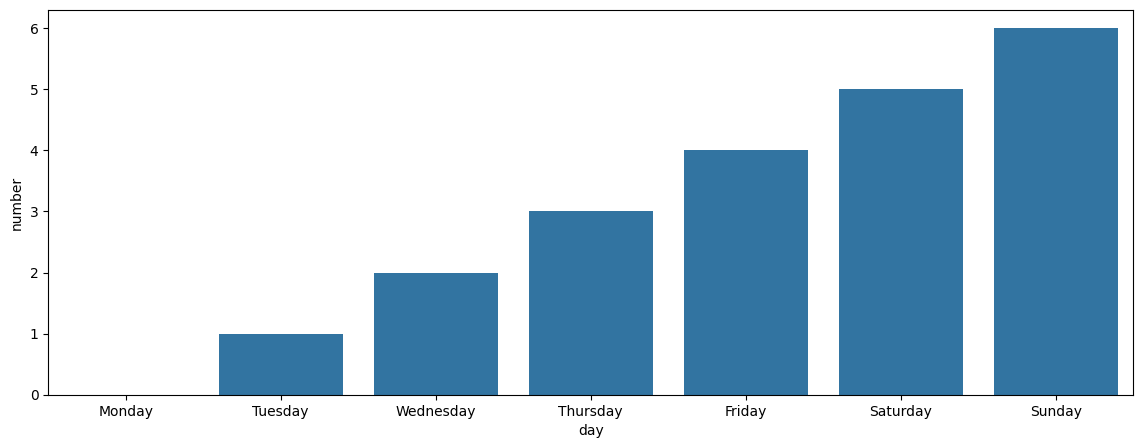

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x="day",y="number",data=df)
plt.show()

## **Total Number of Fires were reported in 2015 (Visualizing data based on each month)**

In [ ]:
data[data['year']==2015]

,year,state,month,number,date,month_new
17,2015,Acre,Janeiro,1.000,2015-01-01,Jan
37,2015,Acre,Fevereiro,2.000,2015-01-01,Feb
57,2015,Acre,Março,2.000,2015-01-01,Mar
77,2015,Acre,Abril,3.000,2015-01-01,Apr
97,2015,Acre,Maio,2.000,2015-01-01,May
...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,Aug
6392,2015,Tocantins,Setembro,5.510,2015-01-01,Sep
6412,2015,Tocantins,Outubro,4.844,2015-01-01,Oct
6432,2015,Tocantins,Novembro,833.000,2015-01-01,Nov


In [ ]:
fire=data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,Jul,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


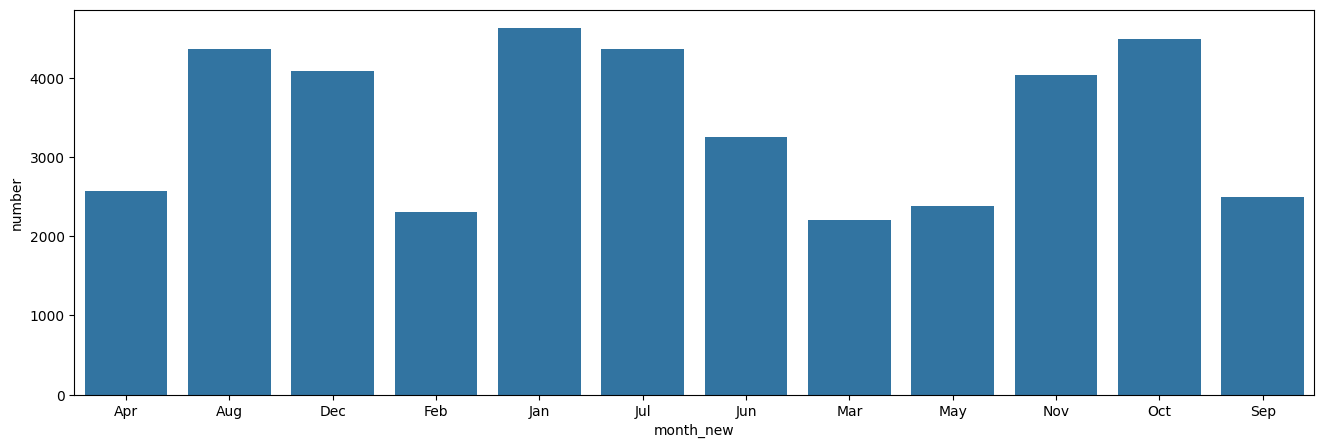

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)
plt.show()

## **Average Number of Fires were reported from Highest to Lowest(State Wise)**

In [ ]:
data8 =data.groupby('state')['number'].mean().sort_values(ascending=False)
data8

,number
state,
Sao Paulo,213.896226
Mato Grosso,203.479975
Bahia,187.222703
Piau,158.174674
Goias,157.721841
Minas Gerais,156.800243
Tocantins,141.037176
Amazonas,128.243218
Ceara,127.314071


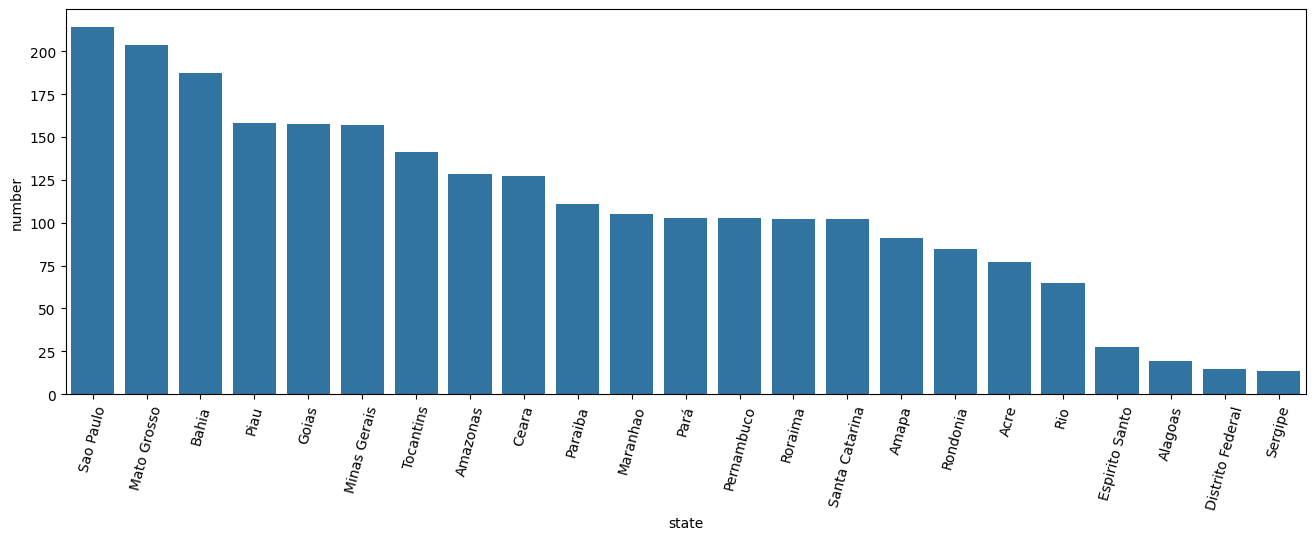

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data= data8.reset_index())
plt.xticks(rotation=75)
plt.show()